In [1]:
from coffea.util import load
import numpy as np
from hist import Hist

In [15]:
!ls /work/dvalsecc/ttHbb/AnalysisConfigs/configs/tests/output_tests_subsamples_v9/

config.json  configurator.pkl  output_all.coffea  parameters_dump.yaml


In [20]:
from omegaconf import OmegaConf

params = OmegaConf.load("/work/dvalsecc/ttHbb/AnalysisConfigs/configs/tests/output_tests_subsamples_v9/parameters_dump.yaml")

In [18]:
params.lumi

{'picobarns': {'2016_PreVFP': {'B': 5829.427727, 'C': 2601.678092, 'D': 4286.031797, 'E': 4065.974751, 'F': 2865.073752, 'tot': 19648.186119}, '2016_PostVFP': {'F': 584.321253, 'G': 7653.261227, 'H': 8740.119304, 'tot': 16977.701784}, '2017': {'B': 4803.371586, 'C': 9574.029838, 'D': 4247.792714, 'E': 9314.581016, 'F': 13539.905374, 'tot': 41479.680528}, '2018': {'A': 14027.614284, 'B': 7066.552169, 'C': 6898.816878, 'D': 31839.492009, 'tot': 59832.47534}}, 'goldenJSON': {'2016_PreVFP': '${default_params_dir:}/datacert/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt', '2016_PostVFP': '${default_params_dir:}/datacert/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt', '2017': '${default_params_dir:}/datacert/Cert_294927-306462_13TeV_UL2017_Collisions17_GoldenJSON.txt', '2018': '${default_params_dir:}/datacert/Cert_314472-325175_13TeV_Legacy2018_Collisions18_JSON.txt'}}

In [60]:
df = load("/work/dvalsecc/ttHbb/AnalysisConfigs/configs/zmumu/output_all_v3/output_all.coffea")

In [61]:
df["cutflow"]

{'initial': {'DATA_SingleMuon_2018_EraA': 241608232,
  'DYJetsToLL_M-50_2018': 195510810,
  'DATA_SingleMuon_2018_EraD': 513909894,
  'DATA_SingleMuon_2018_EraC': 109986009,
  'DATA_SingleMuon_2018_EraB': 119918017},
 'skim': {'DATA_SingleMuon_2018_EraA': 182721650,
  'DYJetsToLL_M-50_2018': 42180665,
  'DATA_SingleMuon_2018_EraD': 416492318,
  'DATA_SingleMuon_2018_EraC': 89702938,
  'DATA_SingleMuon_2018_EraB': 91326404},
 'presel': {'DATA_SingleMuon_2018_EraA': 10474575,
  'DYJetsToLL_M-50_2018': 24267626,
  'DATA_SingleMuon_2018_EraD': 24042954,
  'DATA_SingleMuon_2018_EraC': 5193039,
  'DATA_SingleMuon_2018_EraB': 5305372},
 'baseline': {'DATA_SingleMuon_2018_EraA': {'DATA_SingleMuon': 10474575},
  'DYJetsToLL_M-50_2018': {'DYJetsToLL': 24267626},
  'DATA_SingleMuon_2018_EraD': {'DATA_SingleMuon': 24042954},
  'DATA_SingleMuon_2018_EraC': {'DATA_SingleMuon': 5193039},
  'DATA_SingleMuon_2018_EraB': {'DATA_SingleMuon': 5305372}}}

In [36]:
df["sumw"]

{'baseline': {'DYJetsToLL_M-50_2018': {'DYJetsToLL': 44838483.63517786}}}

In [79]:
df["datasets_metadata"] = dfold["datasets_metadata"]

In [5]:
df["columns"]["TTToSemiLeptonic__=1b"]["TTToSemiLeptonic_2017"]["baseline"]["LeptonGood_N"]

KeyError: 'TTToSemiLeptonic__=1b'

In [26]:
df["variables"]["JetGood_eta_1"].keys()

dict_keys(['DATA_SingleEle', 'TTToSemiLeptonic__=1b', 'TTToSemiLeptonic__=2b', 'TTToSemiLeptonic__>2b'])

In [193]:
df["variables"]["mll"]

defaultdict(dict,
            {'DATA_SingleMuon': {'DATA_SingleMuon_2018_EraA': Hist(
                StrCategory(['baseline'], name='cat', label='Category'),
                Regular(100, 0, 200, name='ll.mass', label='$M_{\\ell\\ell}$ [GeV]'),
                storage=Weight()) # Sum: WeightedSum(value=1.04425e+07, variance=1.04425e+07) (WeightedSum(value=1.04746e+07, variance=1.04746e+07) with flow)}})

In [6]:
A = df["variables"]["mll"]["DATA_SingleMuon"]["DATA_SingleMuon_2018_EraA"]

In [7]:
A["baseline",:]

Hist(Regular(100, 0, 200, name='ll.mass', label='$M_{\\ell\\ell}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=1.04425e+07, variance=1.04425e+07) (WeightedSum(value=1.04746e+07, variance=1.04746e+07) with flow)

In [8]:
df["datasets_metadata"]["by_dataset"]["TTToSemiLeptonic_2018"]

{}

In [9]:
from pocket_coffea.utils import plot_utils
from pocket_coffea.parameters.plotting import style_cfg

In [62]:
from importlib import reload

In [72]:
reload(plot_utils)
PlotManager = plot_utils.PlotManager

In [80]:
plotter = PlotManager(
        variables=df["variables"].keys(),
        hist_objs=df['variables'],
        datasets_metadata=df["datasets_metadata"],
        plot_dir="test_plots",
        style_cfg=style_cfg,
        only_cat=[],
        log=False,
        density=False,
        save=True
    )

In [81]:
plotter.shape_objects

{'MuonGood_eta_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d5096e50>,
 'MuonGood_pt_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d5096520>,
 'MuonGood_phi_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d5096ca0>,
 'nElectronGood_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d5096ee0>,
 'nMuonGood_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d51a0b20>,
 'nJets_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d51ef490>,
 'nBJets_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d544ae20>,
 'JetGood_eta_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d5278520>,
 'JetGood_pt_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d58e6ac0>,
 'JetGood_phi_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d51a08b0>,
 'JetGood_btagDeepFlavB_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d51a08e0>,
 'JetGood_eta_2_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7ff4d5084fa0>,
 'JetGood_pt_2_2018': <pocket_coffea

In [82]:
shape =  plotter.shape_objects["mll_2018"]

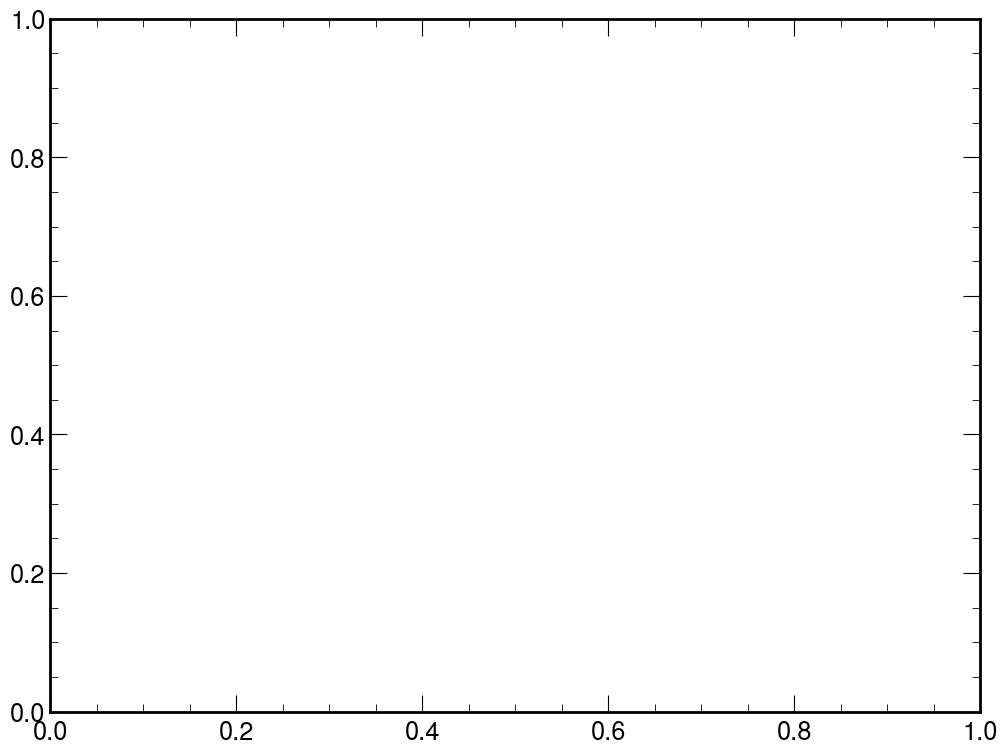

In [87]:
shape.define_figure(False, "")


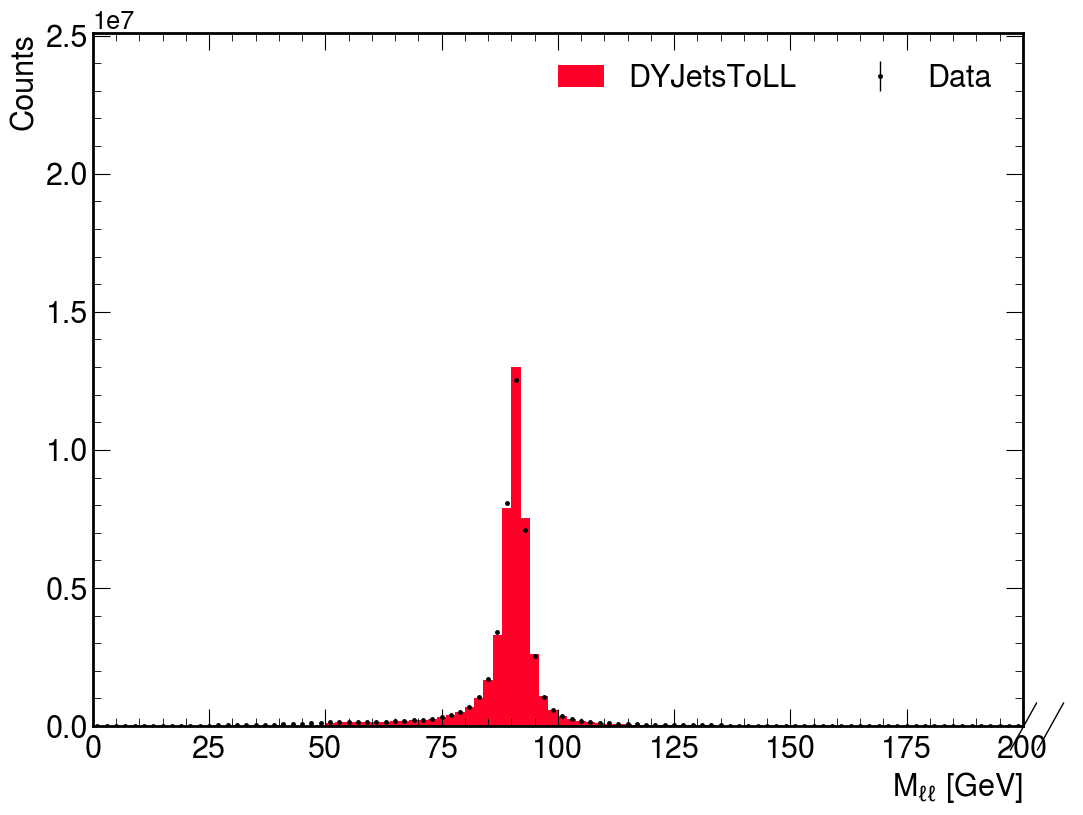

In [88]:
shape.build_stacks("baseline", False)
shape.plot_data()
shape.plot_mc()
shape.fig

In [89]:
plotter.plot_datamc_all(toplabel="test")

/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num) / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:711: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.up / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:715: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.down / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den


Saving

/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num) / den


 test_plots/baseline/MuonGood_eta_1_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:711: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.up / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:715: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.down / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num) / den


SavingSaving  test_plots/baseline/MuonGood_phi_1_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:711: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.up / self.nominal, 1)


test_plots/baseline/MuonGood_pt_1_2018_baseline.png

/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:715: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.down / self.nominal, 1)


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den


Saving

/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num) / den


 test_plots/baseline/nElectronGood_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:711: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.up / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: divide by zero encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:715: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.down / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: divide by zero encountered in divide
  self.ratio_unc = np.sqrt(num) / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num

Saving test_plots/baseline/nMuonGood_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:711: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.up / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:715: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.down / self.nominal, 1)


Saving test_plots/baseline/nJets_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num) / den


Saving test_plots/baseline/nBJets_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:711: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.up / self.nominal, 1)
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:715: RuntimeWarning: invalid value encountered in divide
  return np.where(self.nominal != 0, self.down / self.nominal, 1)


Saving test_plots/baseline/JetGood_eta_1_2018_baseline.png
Saving
 test_plots/baseline/JetGood_phi_1_2018_baseline.pngSaving test_plots/baseline/JetGood_btagDeepFlavB_2_2018_baseline.png
Saving test_plots/baseline/JetGood_eta_2_2018_baseline.png


/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:397: RuntimeWarning: divide by zero encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:400: RuntimeWarning: divide by zero encountered in divide
  self.ratio_unc = np.sqrt(num) / den


Saving test_plots/baseline/mll_2018_baseline.png
Saving test_plots/baseline/JetGood_btagDeepFlavB_1_2018_baseline.png
Saving test_plots/baseline/JetGood_phi_2_2018_baseline.png


ValueError: 'yerr' must not contain negative values

In [183]:
style_cfg

{'fontsize': 22,
 'fontsize_legend_ratio': 12,
 'opts_figure': {'datamc': {'figsize': (12, 9)},
  'datamc_ratio': {'figsize': (12, 12),
   'gridspec_kw': {'height_ratios': (3, 1)},
   'sharex': True},
  'partial': {'figsize': (12, 15),
   'gridspec_kw': {'height_ratios': (3, 1)},
   'sharex': True}},
 'opts_mc': {'histtype': 'fill', 'stack': True},
 'opts_data': {'linestyle': 'solid',
  'linewidth': 0,
  'marker': '.',
  'markersize': 5.0,
  'color': 'black',
  'elinewidth': 1,
  'label': 'Data'},
 'opts_unc': {'total': {'step': 'post',
   'color': (0, 0, 0, 0.4),
   'facecolor': (0, 0, 0, 0.0),
   'linewidth': 0,
   'hatch': '////',
   'zorder': 2},
  'Up': {'linestyle': 'dashed',
   'linewidth': 1,
   'marker': '.',
   'markersize': 1.0,
   'elinewidth': 1},
  'Down': {'linestyle': 'dotted',
   'linewidth': 1,
   'marker': '.',
   'markersize': 1.0,
   'elinewidth': 1}},
 'opts_syst': {'nominal': {'linestyle': 'solid',
   'linewidth': 1,
   'color': 'black'},
  'up': {'linestyle': 'd